In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

matplotlib.rcParams['font.family'] = 'Malgun Gothic' 
matplotlib.rcParams['axes.unicode_minus'] = False  

## 어린이와 노인의 인구 변화

### 1. cvs 파일 읽어오기

In [2]:
df = pd.read_csv('주요_인구지표_성비_인구성장률_인구구조_부양비_등____전국_20240711162703.csv', encoding='cp949')
df

,시점,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위),중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위).1,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위).2
0,시점,총인구(명),인구(명): 0-14세,인구(명): 65세 이상
1,1990,42869283,10973592,2195084
2,1991,43295704,10858720,2266441
3,1992,43747962,10791426,2345856
4,1993,44194628,10734528,2436993
...,...,...,...,...
57,2046,48532231,3925472,18469254
58,2047,48208374,3895330,18689012
59,2048,47863071,3856154,18839313
60,2049,47495914,3808132,18906673


In [3]:
df['시점'][1:].astype(int)

1     1990
2     1991
3     1992
4     1993
5     1994
      ... 
57    2046
58    2047
59    2048
60    2049
61    2050
Name: 시점, Length: 61, dtype: int64

In [4]:
df['중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위)'][1:].astype(int)

1     42869283
2     43295704
3     43747962
4     44194628
5     44641540
        ...   
57    48532231
58    48208374
59    47863071
60    47495914
61    47106960
Name: 중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위), Length: 61, dtype: int64

In [5]:
df['중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위).1'][1:].astype(int)

1     10973592
2     10858720
3     10791426
4     10734528
5     10653446
        ...   
57     3925472
58     3895330
59     3856154
60     3808132
61     3751268
Name: 중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위).1, Length: 61, dtype: int64

In [6]:
df['중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위).2'][1:].astype(int)

1      2195084
2      2266441
3      2345856
4      2436993
5      2542492
        ...   
57    18469254
58    18689012
59    18839313
60    18906673
61    18907853
Name: 중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위).2, Length: 61, dtype: int64

### 2. 새로운 데이터프레임 만들기

In [7]:
# 데이터 가져와보기
df['시점'][1::10].astype(int)
df['중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위)'][1::10].astype(int)
df['중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위).1'][1::10].astype(int)
df['중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위).2'][1::10].astype(int)

1      2195084
11     3394896
21     5366109
31     8151867
41    12980219
51    17151313
61    18907853
Name: 중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위).2, dtype: int64

In [8]:
new_df = pd.DataFrame(
    {
        '년도': df['시점'][1::10].astype(int), 
        '총인구(명)': df['중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위)'][1::10].astype(int), 
        '0-14세': df['중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위).1'][1::10].astype(int), 
        '65세 이상': df['중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위).2'][1::10].astype(int)
	}
)


In [9]:
new_df

,년도,총인구(명),0-14세,65세 이상
1,1990,42869283,10973592,2195084
11,2000,47008111,9911229,3394896
21,2010,49554112,7979439,5366109
31,2020,51836239,6305870,8151867
41,2030,51305713,4159934,12980219
51,2040,50059218,3878751,17151313
61,2050,47106960,3751268,18907853


### 3. 인덱스 재설정

In [10]:
new_df.reset_index(inplace=True, drop=True)

In [11]:
new_df

,년도,총인구(명),0-14세,65세 이상
0,1990,42869283,10973592,2195084
1,2000,47008111,9911229,3394896
2,2010,49554112,7979439,5366109
3,2020,51836239,6305870,8151867
4,2030,51305713,4159934,12980219
5,2040,50059218,3878751,17151313
6,2050,47106960,3751268,18907853


### 4. 비율 만들기

In [12]:
new_df['비율(0-14세)'] = round(new_df['0-14세'] / new_df['총인구(명)'] * 100, 2)
new_df['비율(65세 이상)'] = round(new_df['65세 이상'] / new_df['총인구(명)'] * 100, 2)
new_df

,년도,총인구(명),0-14세,65세 이상,비율(0-14세),비율(65세 이상)
0,1990,42869283,10973592,2195084,25.60,5.12
1,2000,47008111,9911229,3394896,21.08,7.22
2,2010,49554112,7979439,5366109,16.10,10.83
3,2020,51836239,6305870,8151867,12.16,15.73
4,2030,51305713,4159934,12980219,8.11,25.30
5,2040,50059218,3878751,17151313,7.75,34.26
6,2050,47106960,3751268,18907853,7.96,40.14


### 4. 꺽은 선 그래프(어린이)

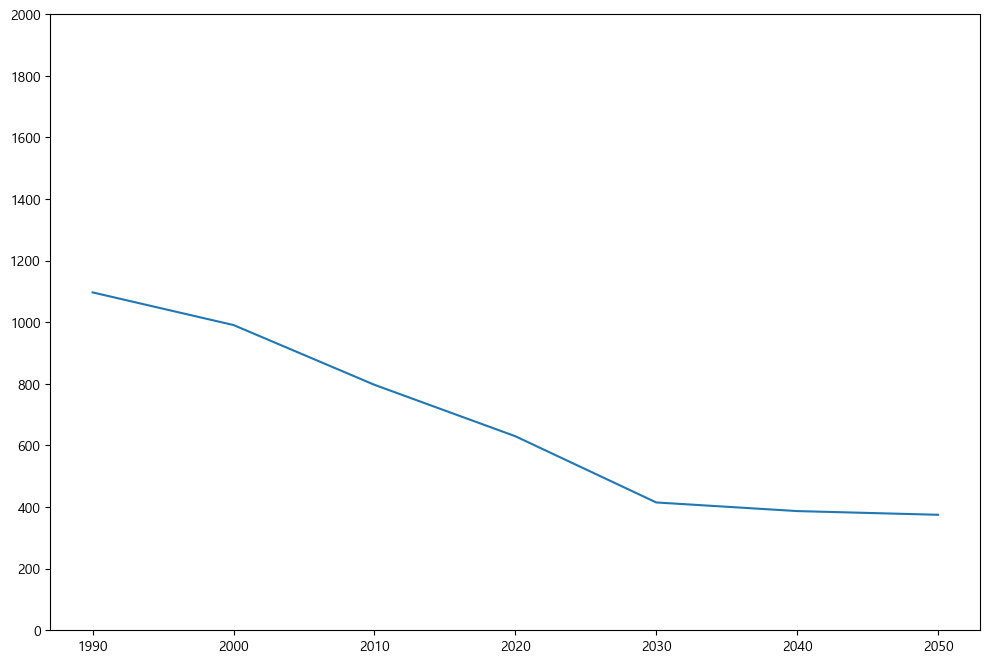

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(
    new_df['년도'], 
    new_df['0-14세']//10000
)

ax.set_xticks(np.arange(1990, 2060, 10))
ax.set_yticks(np.arange(0, 2200, 200))

plt.show()

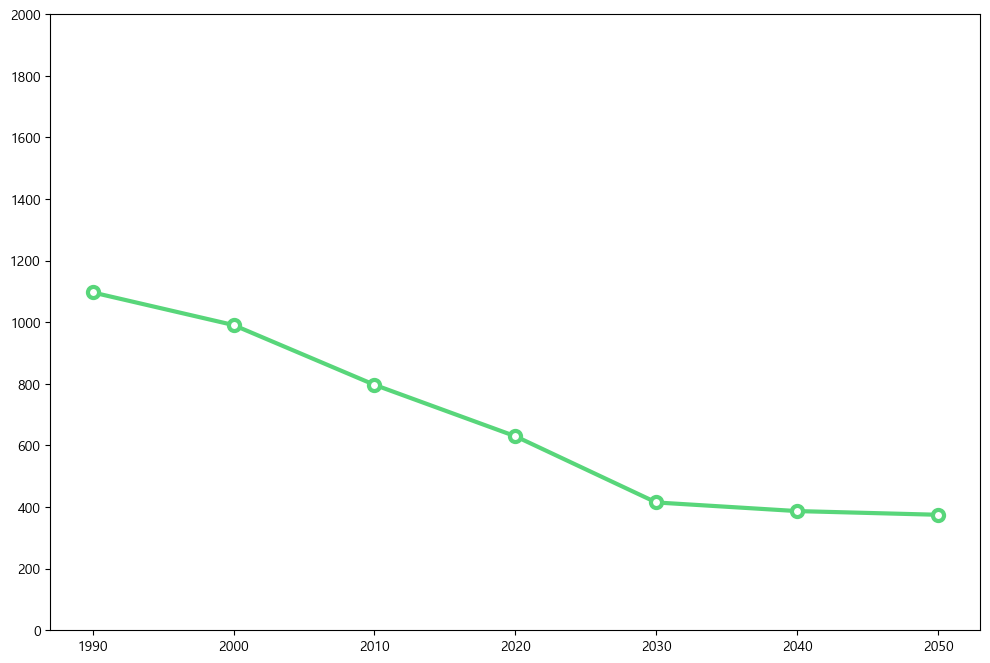

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(
    new_df['년도'], 
    new_df['0-14세']//10000, 
    color='#58D67A', 
    marker='o', 
    markersize=8, 
    markeredgecolor='#58D67A',
    markerfacecolor='white', 
    markeredgewidth='3', 
    linewidth=3, 
    label='어린이'
)

ax.set_xticks(np.arange(1990, 2060, 10))
ax.set_yticks(np.arange(0, 2200, 200))

plt.show()

### 5. 제목 설정

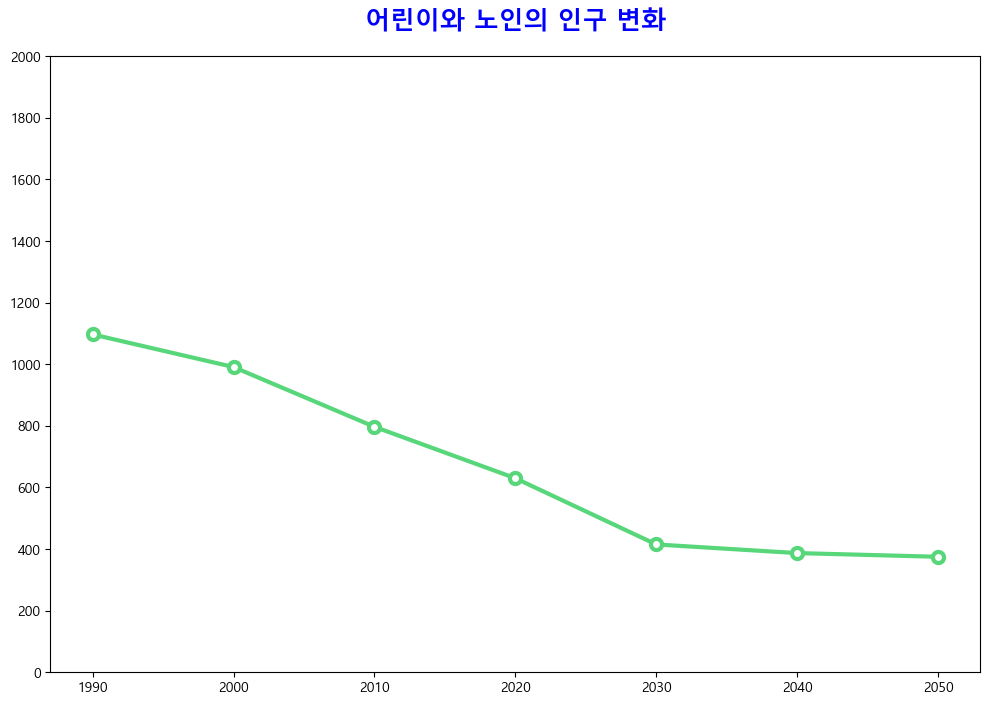

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(
    new_df['년도'], 
    new_df['0-14세']//10000, 
    color='#58D67A', 
    marker='o', 
    markersize=8, 
    markeredgecolor='#58D67A',
    markerfacecolor='white', 
    markeredgewidth='3', 
    linewidth=3, 
    label='어린이'
)

ax.set_xticks(np.arange(1990, 2060, 10))
ax.set_yticks(np.arange(0, 2200, 200))

# 제목 설정하기
# ==========================================================
# loc : 제목을 넣을 위치 (left, center, right)
# pad : 제목과 그래프의 간격 (숫자)
# fontdict : 제목의 글꼴. 딕셔너리로 설정
#   fontsize - 제목 크기 (숫자)
#   fontweight - nomal, bold, heavy, light
#   color - 제목 색깔
# ==========================================================

# 위치 가운데, 제목과 그래프 간격 20, 글자 크기 18, 굵게, 파란색
plt.title('어린이와 노인의 인구 변화', loc='center', pad=20, fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'blue'})
plt.show()

### 6. x, y 축 레이블 설정

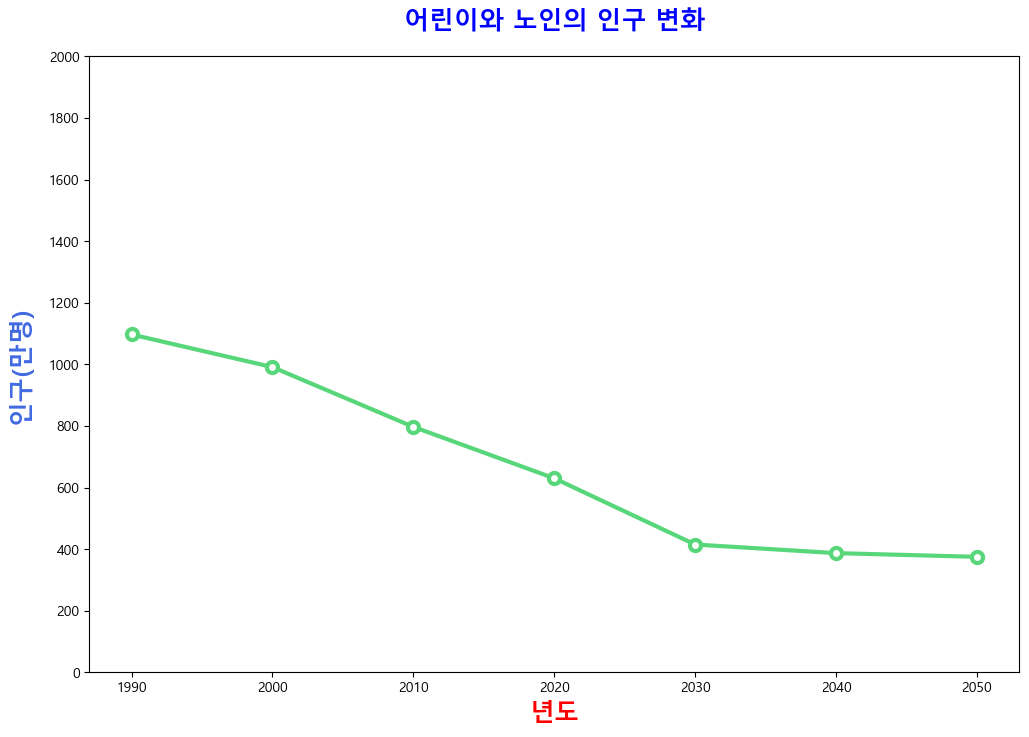

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(
    new_df['년도'], 
    new_df['0-14세']//10000, 
    color='#58D67A', 
    marker='o', 
    markersize=8, 
    markeredgecolor='#58D67A',
    markerfacecolor='white', 
    markeredgewidth='3', 
    linewidth=3, 
    label='어린이'
)

# x, y축 레이블 설정하기
# ==========================================================
# labelpad: 레이블 여백 (숫자)
# loc: 레이블 위치. 
#   ax.set_xlabel(loc='center') - 'left', 'center', 'right'
#   ax.set_ylabel(loc='top')    - 'bottom', 'center', 'top’
# color: 레이블 색깔
# ==========================================================
ax.set_xlabel('년도', labelpad=5, loc='center', color='red', 
              fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'red'})   

ax.set_ylabel('인구(만명)', labelpad=10, loc='center', color='royalblue', 
              fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'red'})     

ax.set_xticks(np.arange(1990, 2060, 10))
ax.set_yticks(np.arange(0, 2200, 200))

plt.title('어린이와 노인의 인구 변화', loc='center', pad=20, fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'blue'})
plt.show()

### 7. 범례 표시

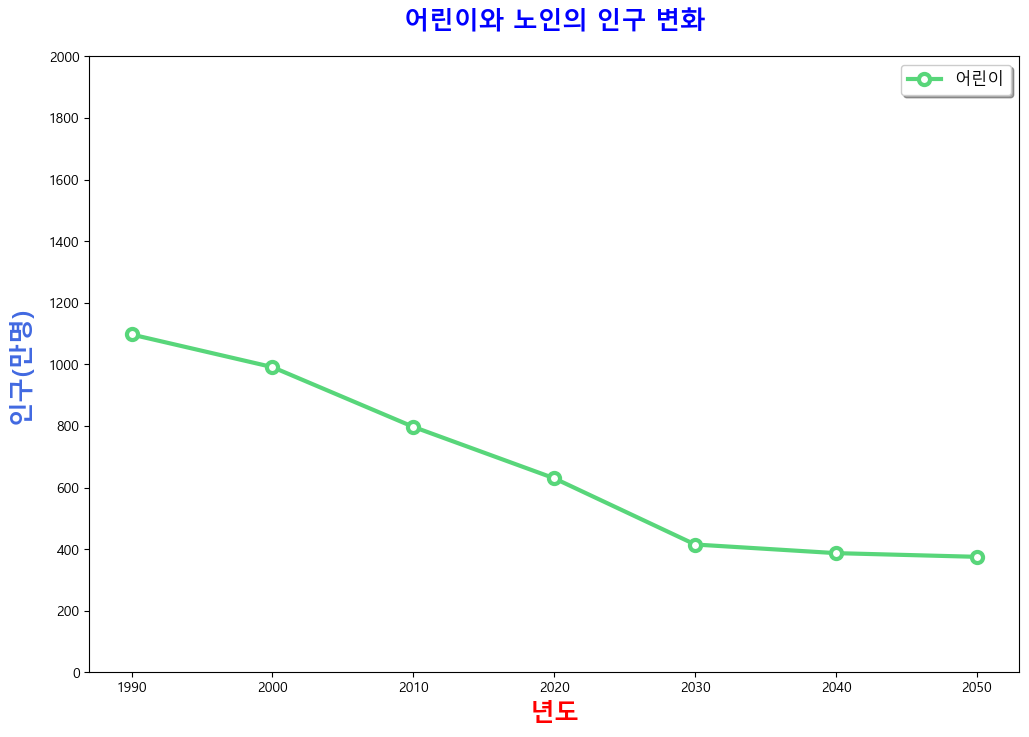

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(
    new_df['년도'], 
    new_df['0-14세']//10000, 
    color='#58D67A', 
    marker='o', 
    markersize=8, 
    markeredgecolor='#58D67A',
    markerfacecolor='white', 
    markeredgewidth='3', 
    linewidth=3, 
    label='어린이'
)


ax.set_xlabel('년도', labelpad=5, loc='center', color='red', 
              fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'red'})   

ax.set_ylabel('인구(만명)', labelpad=10, loc='center', color='royalblue', 
              fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'red'})     

ax.set_xticks(np.arange(1990, 2060, 10))
ax.set_yticks(np.arange(0, 2200, 200))

# 범례
# ==========================================================
# loc: 위치. 
#      best, upper right, upper left, upper center
#            lower right, lower left, lower center
#            center right, center left, center
# fontsize: 글씨 크기 (숫자)
# shadow  : 그림자 (True, False) 
# ==========================================================

ax.legend(loc='upper right', fontsize=12, shadow=True)

plt.title('어린이와 노인의 인구 변화', loc='center', pad=20, fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'blue'})
plt.show()

### 8. 데이터 표시하기

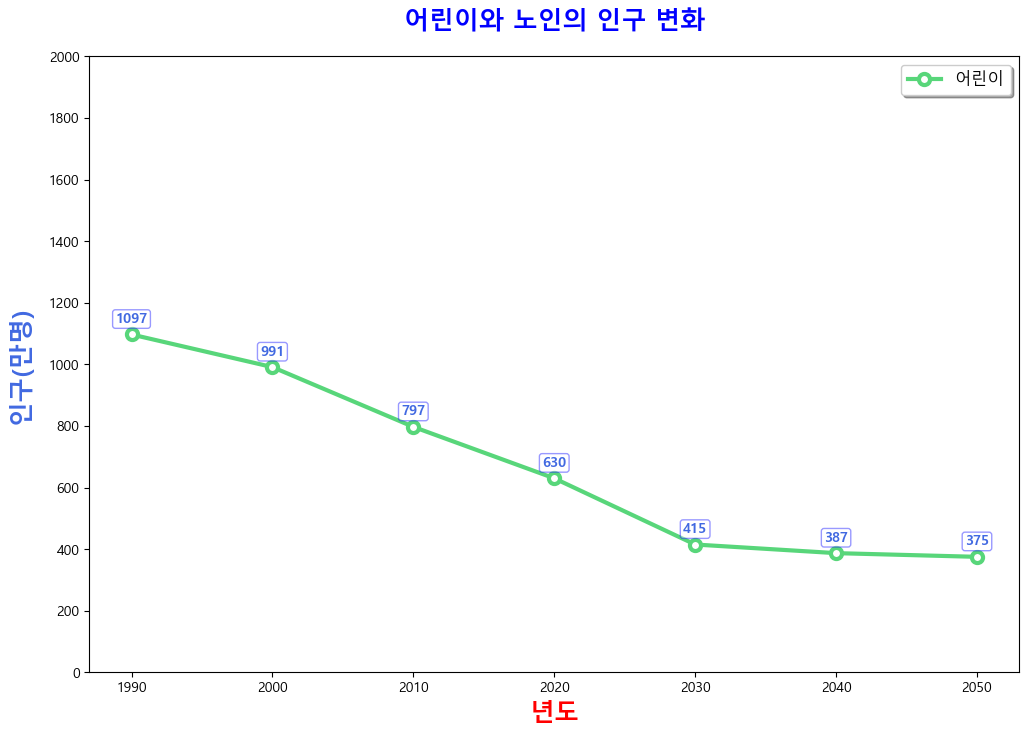

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(
    new_df['년도'], 
    new_df['0-14세']//10000, 
    color='#58D67A', 
    marker='o', 
    markersize=8, 
    markeredgecolor='#58D67A',
    markerfacecolor='white', 
    markeredgewidth='3', 
    linewidth=3, 
    label='어린이'
)


for i in range(0, len(new_df.index), 1):
    ax.text(
        new_df.iloc[i]['년도'], 
        int(new_df.iloc[i]['0-14세']//10000)+50, 
        int(new_df.iloc[i]['0-14세']//10000), 
        fontsize=10,
		color='royalblue', 
		fontweight='bold', 
		va='center',
		ha='center',
		bbox=dict(boxstyle='round', facecolor='white', alpha=0.4, edgecolor="blue", pad=0.2)
	)

ax.set_xlabel('년도', labelpad=5, loc='center', color='red', 
              fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'red'})   

ax.set_ylabel('인구(만명)', labelpad=10, loc='center', color='royalblue', 
              fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'red'})     

ax.set_xticks(np.arange(1990, 2060, 10))
ax.set_yticks(np.arange(0, 2200, 200))
ax.legend(loc='upper right', fontsize=12, shadow=True)

plt.title('어린이와 노인의 인구 변화', loc='center', pad=20, fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'blue'})
plt.show()

### 9. 눈금 설정

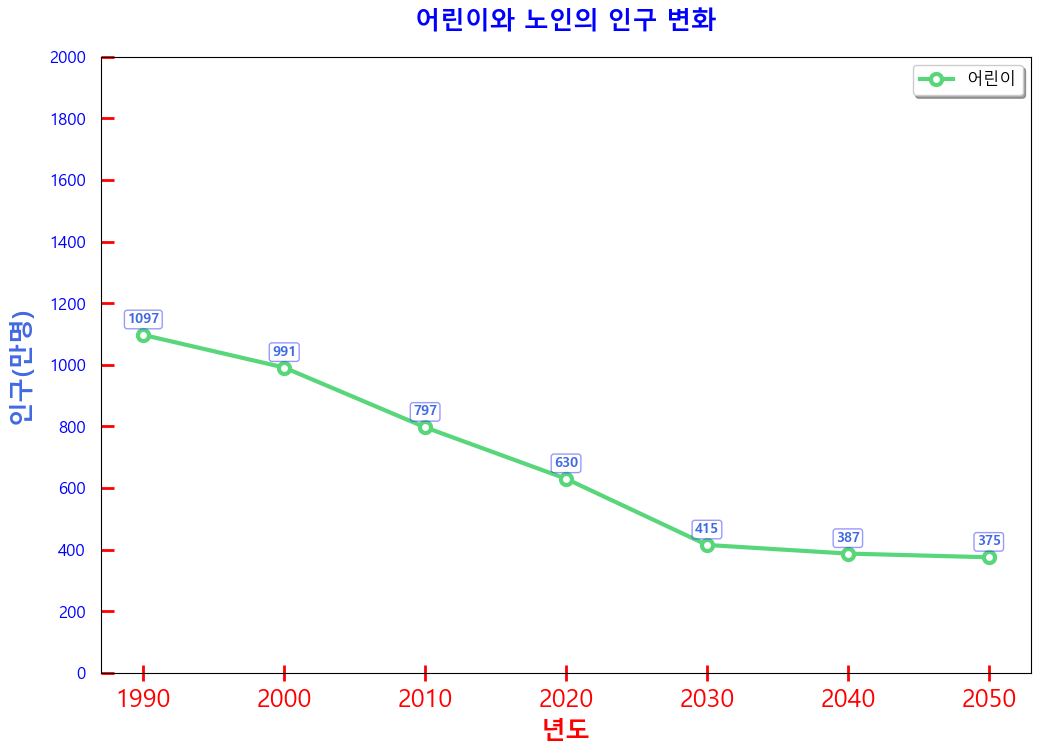

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(
    new_df['년도'], 
    new_df['0-14세']//10000, 
    color='#58D67A', 
    marker='o', 
    markersize=8, 
    markeredgecolor='#58D67A',
    markerfacecolor='white', 
    markeredgewidth='3', 
    linewidth=3, 
    label='어린이'
)


for i in range(0, len(new_df.index), 1):
    ax.text(
        new_df.iloc[i]['년도'], 
        int(new_df.iloc[i]['0-14세']//10000)+50, 
        int(new_df.iloc[i]['0-14세']//10000), 
        fontsize=10,
		color='royalblue', 
		fontweight='bold', 
		va='center',
		ha='center',
		bbox=dict(boxstyle='round', facecolor='white', alpha=0.4, edgecolor="blue", pad=0.2)
	)

ax.set_xlabel('년도', labelpad=5, loc='center', color='red', 
              fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'red'})   

ax.set_ylabel('인구(만명)', labelpad=10, loc='center', color='royalblue', 
              fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'red'})     

ax.set_xticks(np.arange(1990, 2060, 10))
ax.set_yticks(np.arange(0, 2200, 200))

# 눈금 설정하기
# axis: 축 지정. x, y, both
# direction: 눈금 방향. in, out, inout
# length: 눈금의 길이
# pad: 눈금과 레이블의 사이의 거리
# labelsize: 레이블 크기
# labelcolor: 레이블 색깔
# top, bottom, left, right를 True/False로 지정하면 눈금이 표시될 위치 선택 ?
# width: 눈금 두께
# color: 눈금의 색깔
ax.tick_params(axis='y',  direction='in', length=9, pad=11, labelsize=12, labelcolor='blue', width=2, color='red')
ax.tick_params(axis='x',  direction='inout', length=12, pad=5, labelsize=18, labelcolor='red', width=2, color='red')


ax.legend(loc='upper right', fontsize=12, shadow=True)

plt.title('어린이와 노인의 인구 변화', loc='center', pad=20, fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'blue'})
plt.show()

### 10. 격자(그리드) 설정

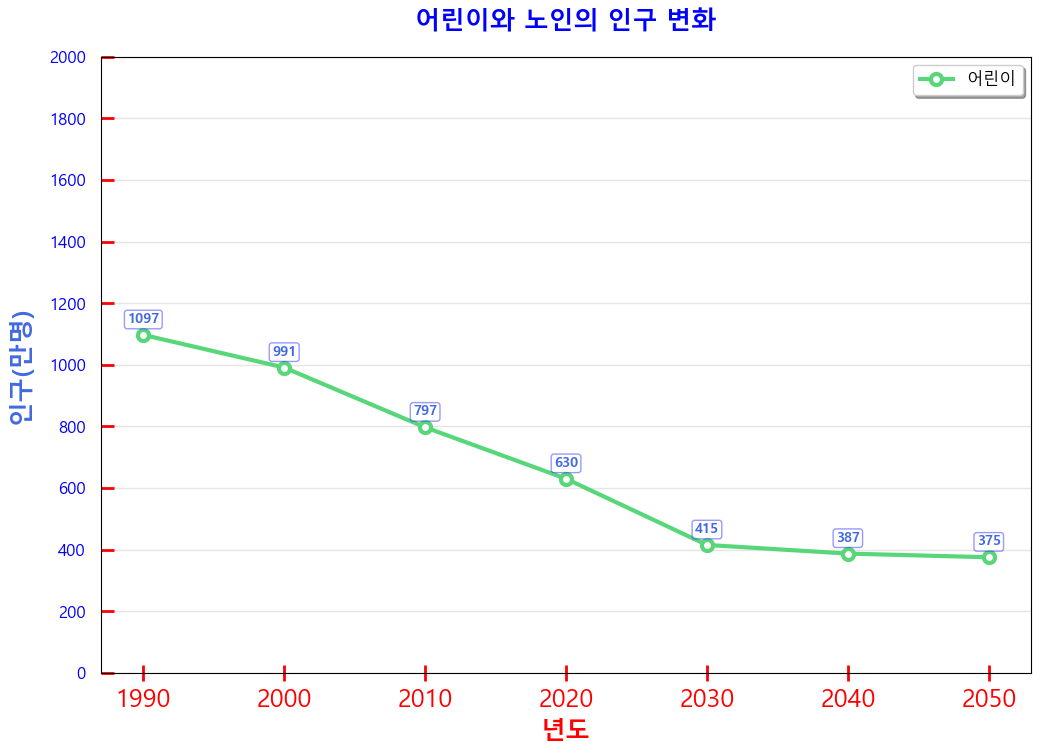

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(
    new_df['년도'], 
    new_df['0-14세']//10000, 
    color='#58D67A', 
    marker='o', 
    markersize=8, 
    markeredgecolor='#58D67A',
    markerfacecolor='white', 
    markeredgewidth='3', 
    linewidth=3, 
    label='어린이'
)


for i in range(0, len(new_df.index), 1):
    ax.text(
        new_df.iloc[i]['년도'], 
        int(new_df.iloc[i]['0-14세']//10000)+50, 
        int(new_df.iloc[i]['0-14세']//10000), 
        fontsize=10,
		color='royalblue', 
		fontweight='bold', 
		va='center',
		ha='center',
		bbox=dict(boxstyle='round', facecolor='white', alpha=0.4, edgecolor="blue", pad=0.2)
	)

ax.set_xlabel('년도', labelpad=5, loc='center', color='red', 
              fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'red'})   

ax.set_ylabel('인구(만명)', labelpad=10, loc='center', color='royalblue', 
              fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'red'})     

ax.set_xticks(np.arange(1990, 2060, 10))
ax.set_yticks(np.arange(0, 2200, 200))

ax.tick_params(axis='y',  direction='in', length=9, pad=11, labelsize=12, labelcolor='blue', width=2, color='red')
ax.tick_params(axis='x',  direction='inout', length=12, pad=5, labelsize=18, labelcolor='red', width=2, color='red')

ax.legend(loc='upper right', fontsize=12, shadow=True)

# 격자(그리드) y는 가로 방향. 색깔 회색, 투명도 0.2, 선 스타일 실선, 선 두께 1
# True로 설정하면 x, y 축 둘 다 표시
# plt.grid(True, axis='y') 가로 방향
# plt.grid(True, axis='x') 세 로 방향
plt.grid(True, axis='y', color='gray', alpha=0.2, linestyle='-', linewidth=1)

plt.title('어린이와 노인의 인구 변화', loc='center', pad=20, fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'blue'})
plt.show()

### 11. 꺽은선 그래프(노인)

In [21]:
new_df

,년도,총인구(명),0-14세,65세 이상,비율(0-14세),비율(65세 이상)
0,1990,42869283,10973592,2195084,25.60,5.12
1,2000,47008111,9911229,3394896,21.08,7.22
2,2010,49554112,7979439,5366109,16.10,10.83
3,2020,51836239,6305870,8151867,12.16,15.73
4,2030,51305713,4159934,12980219,8.11,25.30
5,2040,50059218,3878751,17151313,7.75,34.26
6,2050,47106960,3751268,18907853,7.96,40.14


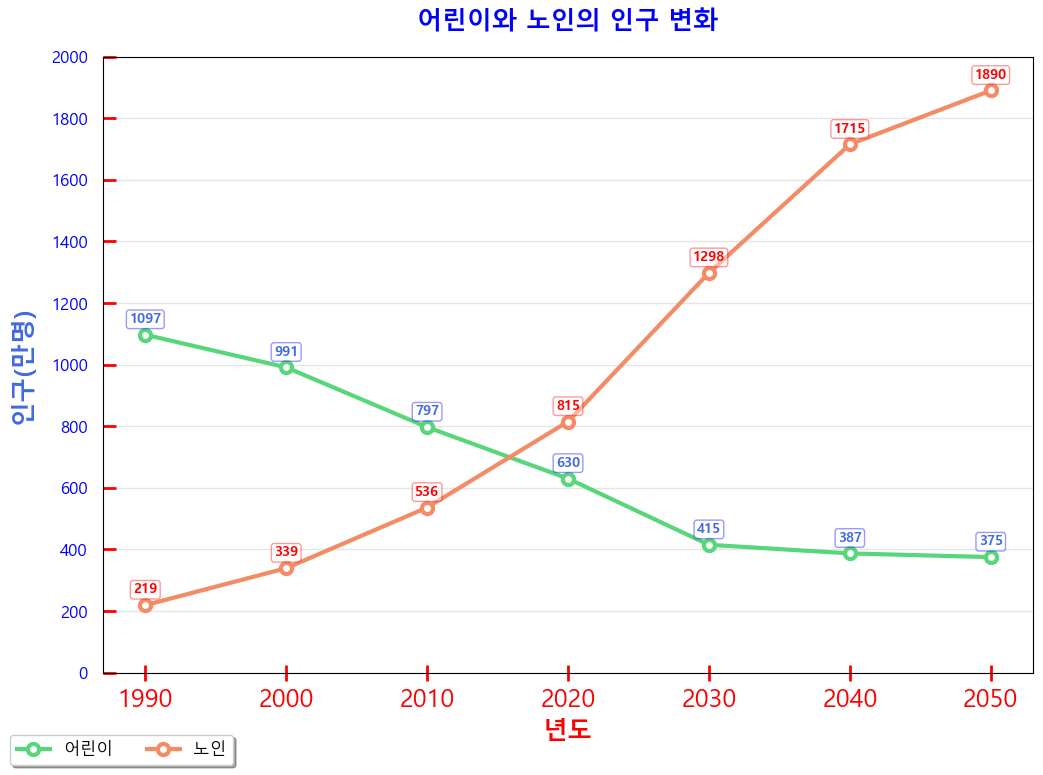

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(
    new_df['년도'], 
    new_df['0-14세']//10000, 
    color='#58D67A', 
    marker='o', 
    markersize=8, 
    markeredgecolor='#58D67A',
    markerfacecolor='white', 
    markeredgewidth='3', 
    linewidth=3, 
    label='어린이'
)


for i in range(0, len(new_df.index), 1):
    ax.text(
        new_df.iloc[i]['년도'], 
        int(new_df.iloc[i]['0-14세']//10000)+50, 
        int(new_df.iloc[i]['0-14세']//10000), 
        fontsize=10,
		color='royalblue', 
		fontweight='bold', 
		va='center',
		ha='center',
		bbox=dict(boxstyle='round', facecolor='white', alpha=0.4, edgecolor="blue", pad=0.2)
	)


# 여기에 추가
ax.plot(
    new_df['년도'], 
    new_df['65세 이상']//10000, 
    color='#F48B65', 
    marker='o', 
    markersize=8, 
    markeredgecolor='#F48B65',
    markerfacecolor='white', 
    markeredgewidth='3', 
    linewidth=3, 
    label='노인'
)

for i in range(0, len(new_df.index), 1):
    ax.text(
        new_df.iloc[i]['년도'], 
        int(new_df.iloc[i]['65세 이상']//10000)+50, 
        int(new_df.iloc[i]['65세 이상']//10000), 
        fontsize=10,
		color='red', 
		fontweight='bold', 
		va='center',
		ha='center',
		bbox=dict(boxstyle='round', facecolor='white', alpha=0.4, edgecolor="red", pad=0.2)
	)


ax.set_xlabel('년도', labelpad=5, loc='center', color='red', 
              fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'red'})   

ax.set_ylabel('인구(만명)', labelpad=10, loc='center', color='royalblue', 
              fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'red'})     

ax.set_xticks(np.arange(1990, 2060, 10))
ax.set_yticks(np.arange(0, 2200, 200))

ax.tick_params(axis='y',  direction='in', length=9, pad=11, labelsize=12, labelcolor='blue', width=2, color='red')
ax.tick_params(axis='x',  direction='inout', length=12, pad=5, labelsize=18, labelcolor='red', width=2, color='red')


# 범례 수정
ax.legend(loc=(-0.1, -0.15), fontsize=12, shadow=True, ncol=2)

plt.grid(True, axis='y', color='gray', alpha=0.2, linestyle='-', linewidth=1)
plt.title('어린이와 노인의 인구 변화', loc='center', pad=20, fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'blue'})

plt.show()

### 12. 막대 그래프

In [23]:
new_df

,년도,총인구(명),0-14세,65세 이상,비율(0-14세),비율(65세 이상)
0,1990,42869283,10973592,2195084,25.60,5.12
1,2000,47008111,9911229,3394896,21.08,7.22
2,2010,49554112,7979439,5366109,16.10,10.83
3,2020,51836239,6305870,8151867,12.16,15.73
4,2030,51305713,4159934,12980219,8.11,25.30
5,2040,50059218,3878751,17151313,7.75,34.26
6,2050,47106960,3751268,18907853,7.96,40.14


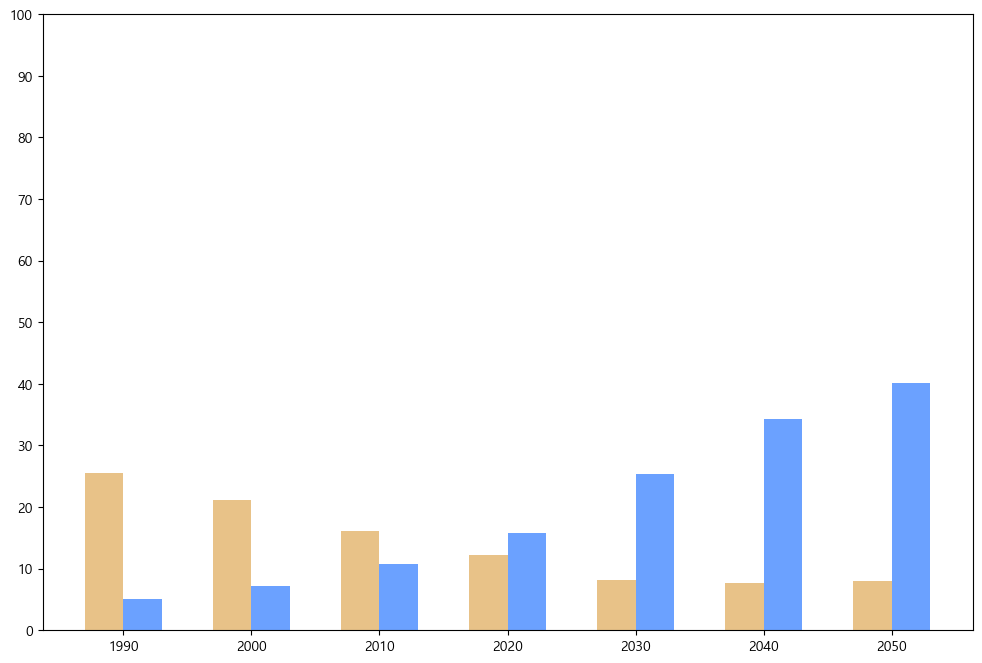

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))

w = 1.5
ax.bar(new_df['년도']-w, new_df['비율(0-14세)'], color='#E8C288', label='비율(어린이)', width=3)
ax.bar(new_df['년도']+w, new_df['비율(65세 이상)'], color='#6BA1FF', label='비율(65세 이상)', width=3)

ax.set_xticks(np.arange(1990, 2060, 10))
ax.set_yticks(np.arange(0, 110, 10))  

plt.show()

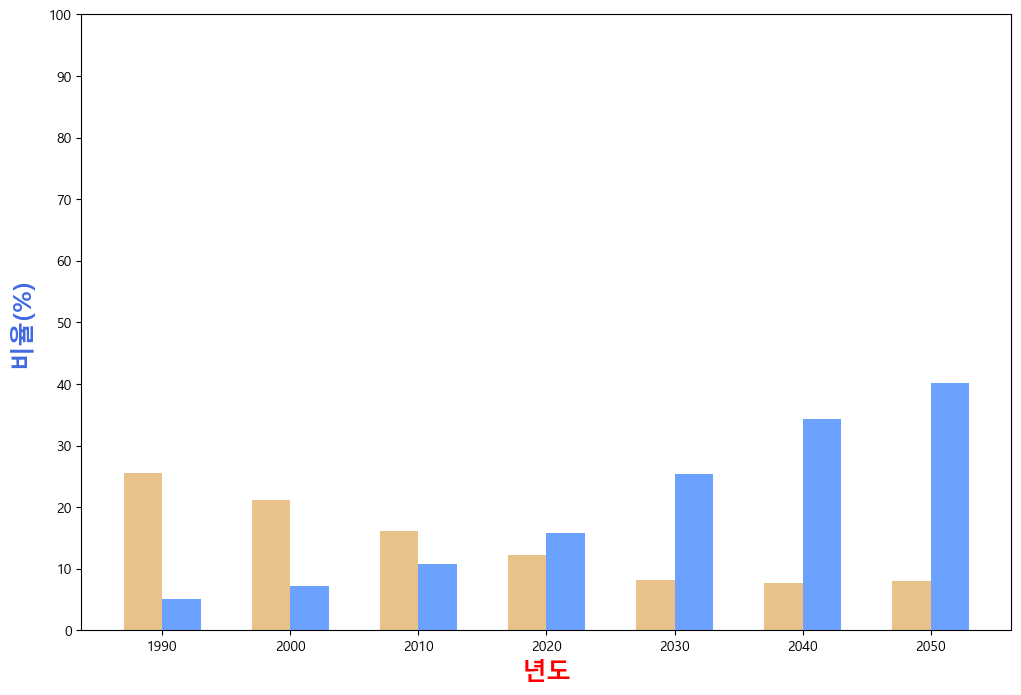

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))

w = 1.5
ax.bar(new_df['년도']-w, new_df['비율(0-14세)'], color='#E8C288', label='비율(어린이)', width=3)
ax.bar(new_df['년도']+w, new_df['비율(65세 이상)'], color='#6BA1FF', label='비율(65세 이상)', width=3)

ax.set_xticks(np.arange(1990, 2060, 10))
ax.set_yticks(np.arange(0, 110, 10))

ax.set_xlabel('년도', labelpad=5, loc='center', color='red', 
              fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'red'})   

ax.set_ylabel('비율(%)', labelpad=10, loc='center', color='royalblue', 
              fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'red'})     

plt.show()

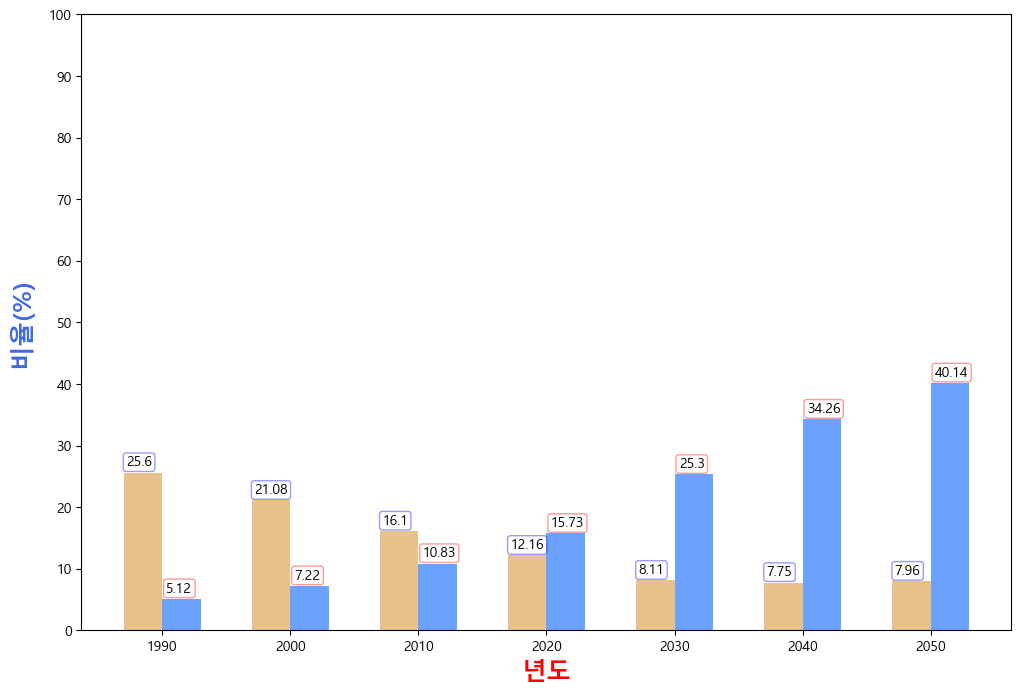

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))

w = 1.5
ax.bar(new_df['년도']-w, new_df['비율(0-14세)'], color='#E8C288', label='비율(어린이)', width=3)
ax.bar(new_df['년도']+w, new_df['비율(65세 이상)'], color='#6BA1FF', label='비율(65세 이상)', width=3)

for i in range(0, len(new_df.index), 1):
    ax.annotate(
        new_df.iloc[i]['비율(0-14세)'], 
        (new_df.iloc[i]['년도'], new_df.iloc[i]['비율(0-14세)']), 
        xytext=(-26, 5), 
        textcoords='offset points', 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.4, edgecolor="blue", pad=0.2)
	)


for i in range(0, len(new_df.index), 1):
    ax.annotate(
        new_df.iloc[i]['비율(65세 이상)'], 
        (new_df.iloc[i]['년도'], new_df.iloc[i]['비율(65세 이상)']), 
        xytext=(3, 5), 
        textcoords='offset points', 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.4, edgecolor="red", pad=0.2)
	)
    
ax.set_xticks(np.arange(1990, 2060, 10))
ax.set_yticks(np.arange(0, 110, 10))

ax.set_xlabel('년도', labelpad=5, loc='center', color='red', 
              fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'red'})   

ax.set_ylabel('비율(%)', labelpad=10, loc='center', color='royalblue', 
              fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'red'})     

plt.show()

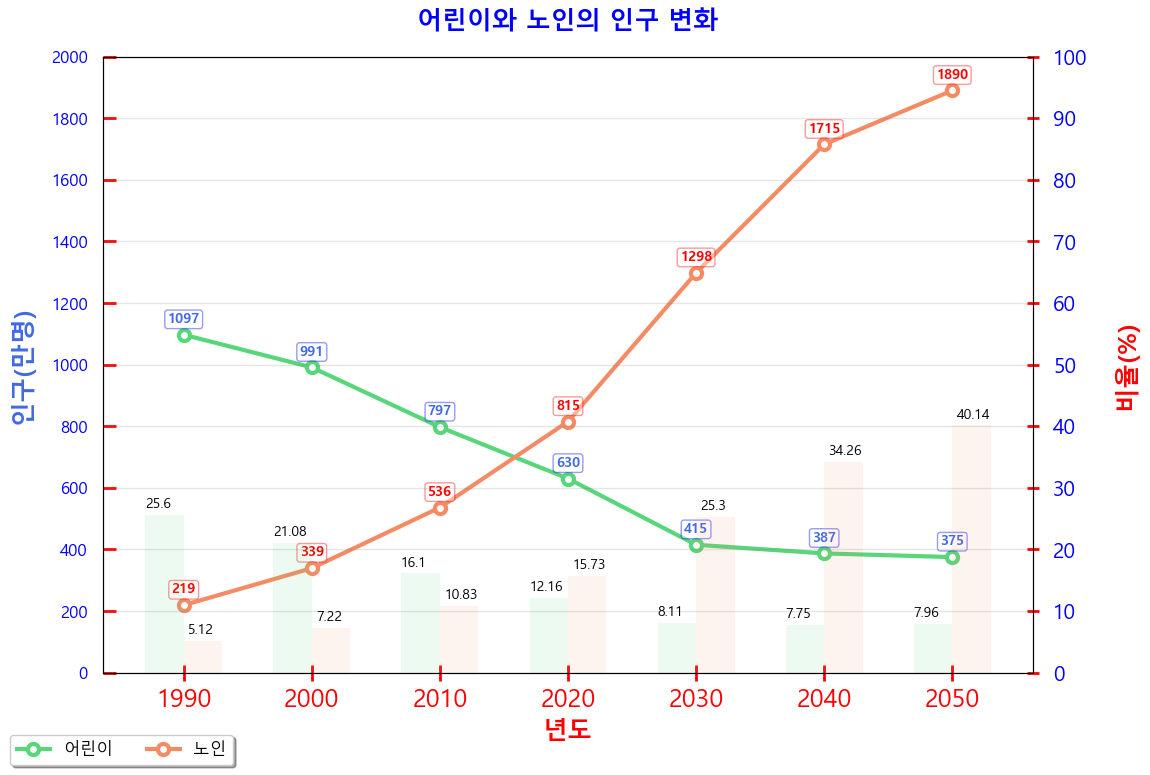

In [39]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(
    new_df['년도'], 
    new_df['0-14세']//10000, 
    color='#58D67A', 
    marker='o', 
    markersize=8, 
    markeredgecolor='#58D67A',
    markerfacecolor='white', 
    markeredgewidth='3', 
    linewidth=3, 
    label='어린이'
)


for i in range(0, len(new_df.index), 1):
    ax.text(
        new_df.iloc[i]['년도'], 
        int(new_df.iloc[i]['0-14세']//10000)+50, 
        int(new_df.iloc[i]['0-14세']//10000), 
        fontsize=10,
		color='royalblue', 
		fontweight='bold', 
		va='center',
		ha='center',
		bbox=dict(boxstyle='round', facecolor='white', alpha=0.4, edgecolor="blue", pad=0.2)
	)


# 여기에 추가
ax.plot(
    new_df['년도'], 
    new_df['65세 이상']//10000, 
    color='#F48B65', 
    marker='o', 
    markersize=8, 
    markeredgecolor='#F48B65',
    markerfacecolor='white', 
    markeredgewidth='3', 
    linewidth=3, 
    label='노인'
)

for i in range(0, len(new_df.index), 1):
    ax.text(
        new_df.iloc[i]['년도'], 
        int(new_df.iloc[i]['65세 이상']//10000)+50, 
        int(new_df.iloc[i]['65세 이상']//10000), 
        fontsize=10,
		color='red', 
		fontweight='bold', 
		va='center',
		ha='center',
		bbox=dict(boxstyle='round', facecolor='white', alpha=0.4, edgecolor="red", pad=0.2)
	)


ax.set_xlabel('년도', labelpad=5, loc='center', color='red', 
              fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'red'})   

ax.set_ylabel('인구(만명)', labelpad=10, loc='center', color='royalblue', 
              fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'red'})     

ax.set_xticks(np.arange(1990, 2060, 10))
ax.set_yticks(np.arange(0, 2200, 200))

ax.tick_params(axis='y',  direction='in', length=9, pad=11, labelsize=12, labelcolor='blue', width=2, color='red')
ax.tick_params(axis='x',  direction='inout', length=12, pad=5, labelsize=18, labelcolor='red', width=2, color='red')

ax.legend(loc=(-0.1, -0.15), fontsize=12, shadow=True, ncol=2)


ax2 = ax.twinx()

w = 1.5
ax2.bar(new_df['년도']-w, new_df['비율(0-14세)'], color='#58D67A', label='비율(어린이)', width=3, alpha=0.1)
ax2.bar(new_df['년도']+w, new_df['비율(65세 이상)'], color='#F48B65', label='비율(65세 이상)',  width=3, alpha=0.1)

for i in range(0, len(new_df.index), 1):
    ax2.annotate(new_df.iloc[i]['비율(0-14세)'], 
                (new_df.iloc[i]['년도'], new_df.iloc[i]['비율(0-14세)']), 
                xytext=(-28, 5), 
                textcoords='offset points')

for i in range(0, len(new_df.index), 1):
    ax2.annotate(new_df.iloc[i]['비율(65세 이상)'], 
                (new_df.iloc[i]['년도'], new_df.iloc[i]['비율(65세 이상)']), 
                xytext=(3, 5), 
                textcoords='offset points')   
    

ax2.set_yticks(np.arange(0, 110, 10))
ax2.set_ylabel('비율(%)', labelpad=20, loc='center', color='red', 
              fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'red'})
ax2.tick_params(axis='y',  direction='inout', length=9, pad=10, labelsize=15, labelcolor='blue', width=2, color='red')

plt.grid(True, axis='y', color='gray', alpha=0.2, linestyle='-', linewidth=1)
plt.title('어린이와 노인의 인구 변화', loc='center', pad=20, fontdict={'fontsize': 18, 'fontweight':'bold', 'color':'blue'})

plt.show()